In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('mortality_rates.csv')

### Descriptive

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71417 entries, 0 to 71416
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GHE code         71417 non-null  float64
 1   Disease Group    71417 non-null  object 
 2   Disease Group 2  71417 non-null  object 
 3   Disease Name     71417 non-null  object 
 4   Country          71417 non-null  object 
 5   Death Rate       71417 non-null  float64
 6   Year             71417 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
data.head()

,GHE code,Disease Group,Disease Group 2,Disease Name,Country,Death Rate,Year
0,30.0,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Afghanistan,131.94,2000
1,30.0,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Albania,0.79,2000
2,30.0,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Algeria,10.09,2000
3,30.0,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Angola,116.96,2000
4,30.0,"Communicable, maternal, perinatal and nutritio...",Infectious and parasitic diseases,Tuberculosis,Antigua and Barbuda,1.10,2000


In [12]:
data['Death Rate'] = round(data['Death Rate'],2)

In [16]:
data.set_index('GHE code',inplace = True)

In [19]:
data.describe()

,Death Rate,Year
count,71417.000000,71417.000000
mean,8.617246,2011.009017
std,27.519493,7.103803
min,0.000000,2000.000000
25%,0.400000,2010.000000
50%,1.880000,2015.000000
75%,6.090000,2019.000000
max,2328.150000,2019.000000


In [21]:
data.describe(include = 'O')

,Disease Group,Disease Group 2,Disease Name,Country
count,71417,71417,71417,71417
unique,3,16,111,183
top,Noncommunicable diseases,Malignant neoplasms,Congenital heart anomalies,Brazil
freq,49050,17308,732,433


In [20]:
data.isna().sum()

Disease Group      0
Disease Group 2    0
Disease Name       0
Country            0
Death Rate         0
Year               0
dtype: int64

### Data Split

In [17]:
data_2019 = data[data['Year'] == 2019]
data_2015 = data[data['Year'] == 2015]
data_2010 = data[data['Year'] == 2010]
data_2000 = data[data['Year'] == 2000]

In [18]:
data_2019.describe()

,Death Rate,Year
count,17879.000000,17879.0
mean,7.457309,2019.0
std,20.971161,0.0
min,0.000000,2019.0
25%,0.370000,2019.0
50%,1.730000,2019.0
75%,5.590000,2019.0
max,389.750000,2019.0


In [22]:
data.describe(include = 'O')

,Disease Group,Disease Group 2,Disease Name,Country
count,71417,71417,71417,71417
unique,3,16,111,183
top,Noncommunicable diseases,Malignant neoplasms,Congenital heart anomalies,Brazil
freq,49050,17308,732,433


### By Diseases Analysis

In [29]:
data.groupby('Disease Group')['Death Rate'].mean().sort_values(ascending = False)

Disease Group
Communicable, maternal, perinatal and nutritional conditions    10.214171
Noncommunicable diseases                                         8.363726
Injuries                                                         7.182890
Name: Death Rate, dtype: float64

In [31]:
data_2019.groupby('Disease Group')['Death Rate'].mean().sort_values(ascending = False)

Disease Group
Noncommunicable diseases                                        7.646594
Communicable, maternal, perinatal and nutritional conditions    7.426402
Injuries                                                        6.275155
Name: Death Rate, dtype: float64

In [30]:
data.groupby('Disease Group 2')['Death Rate'].mean().sort_values(ascending=False)

Disease Group 2
Cardiovascular diseases               47.889811
Respiratory Infectious                18.157910
Respiratory diseases                  15.118839
Infectious and parasitic diseases     11.967570
Intentional injuries                   8.045319
Genitourinary diseases                 7.178328
Unintentional injuries                 6.837604
Digestive diseases                     5.070924
Neurological conditions                4.797699
Malignant neoplasms                    4.731500
Neonatal conditions                    3.916116
Nutritional deficiencies               3.167620
Endocrine, blood, immune disorders     1.284546
Mental and substance use disorders     1.222560
Congenital anomalies                   1.074813
Musculoskeletal diseases               0.548557
Name: Death Rate, dtype: float64

In [32]:
data_2019.groupby('Disease Group 2')['Death Rate'].mean().sort_values(ascending=False)

Disease Group 2
Cardiovascular diseases               42.897158
Respiratory Infectious                15.487122
Respiratory diseases                  13.329763
Infectious and parasitic diseases      7.938018
Genitourinary diseases                 7.027726
Intentional injuries                   6.907596
Unintentional injuries                 6.013504
Neurological conditions                5.104719
Malignant neoplasms                    4.495773
Digestive diseases                     4.479672
Neonatal conditions                    3.306503
Nutritional deficiencies               2.149649
Endocrine, blood, immune disorders     1.270273
Mental and substance use disorders     1.130837
Congenital anomalies                   0.959026
Musculoskeletal diseases               0.531932
Name: Death Rate, dtype: float64

In [33]:
data_2019.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False)

Disease Name
Ischaemic heart disease                   126.824208
Stroke                                     85.426230
Lower respiratory infections               46.312131
Chronic obstructive pulmonary disease      27.199126
Kidney diseases                            23.785956
                                             ...    
Anxiety disorders                           0.007083
Iodine deficiency                           0.004091
Other mental and behavioural disorders      0.003333
Migraine                                    0.002667
Eating disorders                            0.000424
Name: Death Rate, Length: 111, dtype: float64

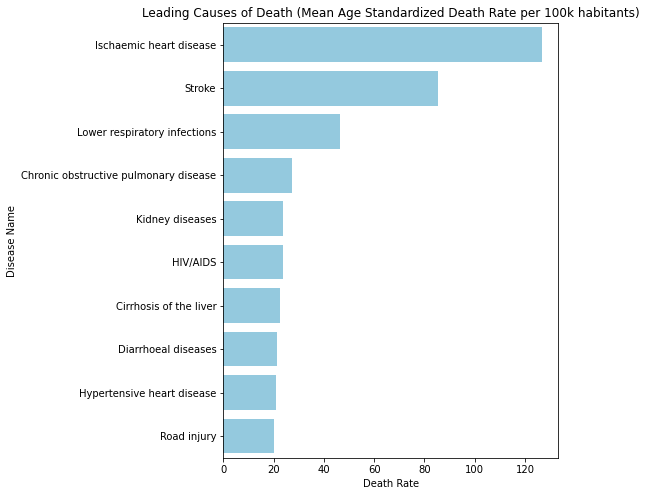

In [52]:
tmp = data_2019.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp = tmp.head(10)

plt.figure(figsize = (6, 8))
sns.barplot(data=tmp, x="Death Rate", y="Disease Name", color="skyblue")   
plt.title("Leading Causes of Death (Mean Age Standardized Death Rate per 100k habitants)")
plt.show()

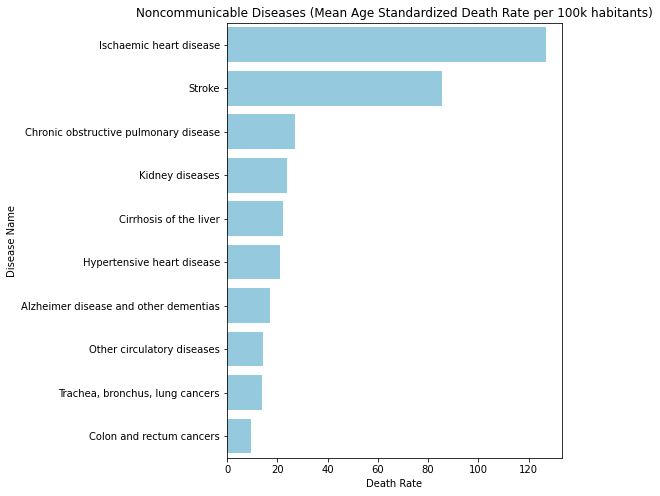

In [58]:
non_communicable = data_2019[data_2019['Disease Group'] == 'Noncommunicable diseases']
tmp2 = non_communicable.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp2 = tmp2.head(10)

plt.figure(figsize = (6, 8))
sns.barplot(data=tmp2, x="Death Rate", y="Disease Name", color="skyblue")
    
plt.title("Noncommunicable Diseases (Mean Age Standardized Death Rate per 100k habitants)")
plt.show()

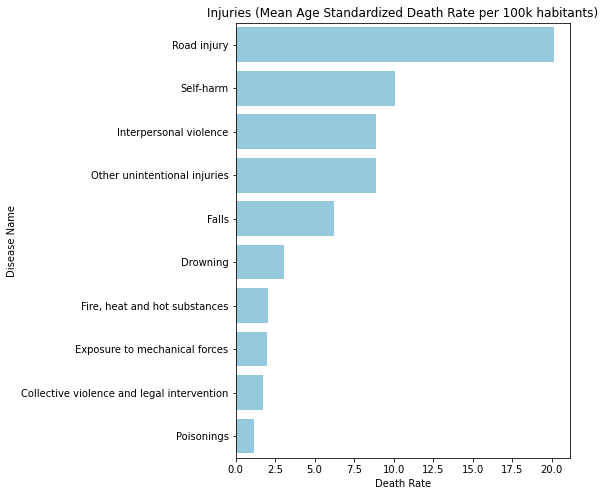

In [60]:
injuries = data_2019[data_2019['Disease Group'] == 'Injuries']
tmp3 = injuries.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp3 = tmp3.head(10)

plt.figure(figsize = (6, 8))
sns.barplot(data=tmp2, x="Death Rate", y="Disease Name", color="skyblue")
    
plt.title("Injuries (Mean Age Standardized Death Rate per 100k habitants)")
plt.show()

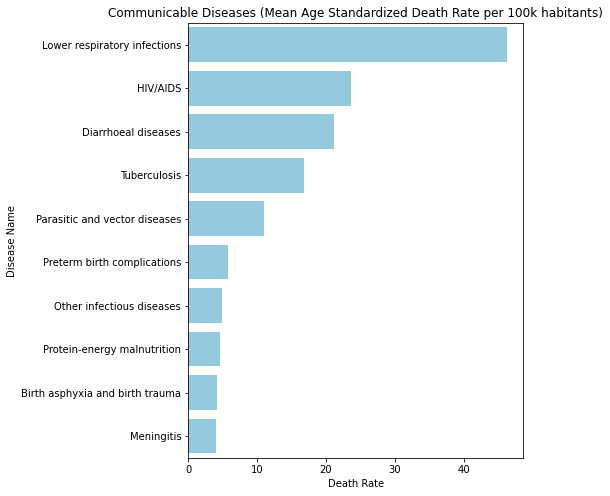

In [63]:
communicable_diseases = data_2019[data_2019['Disease Group'] == 'Communicable, maternal, perinatal and nutritional conditions']
tmp4 = communicable_diseases.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp4 = tmp4.head(10)

plt.figure(figsize = (6, 8))
sns.barplot(data=tmp4, x="Death Rate", y="Disease Name", color="skyblue")
    
plt.title("Communicable Diseases (Mean Age Standardized Death Rate per 100k habitants)")
plt.show()

In [140]:
tmp = data_2019.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp = tmp.head(10)

communicable_diseases = data_2019[data_2019['Disease Group'] == 'Communicable, maternal, perinatal and nutritional conditions']
tmp4 = communicable_diseases.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp4 = tmp4.head(10)

non_communicable = data_2019[data_2019['Disease Group'] == 'Noncommunicable diseases']
tmp2 = non_communicable.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp2 = tmp2.head(10)

injuries = data_2019[data_2019['Disease Group'] == 'Injuries']
tmp3 = injuries.groupby('Disease Name')['Death Rate'].mean().sort_values(ascending=False).reset_index()
tmp3 = tmp3.head(10)

colors = ["darkred"] * 3 + ["lightgrey"] * 7

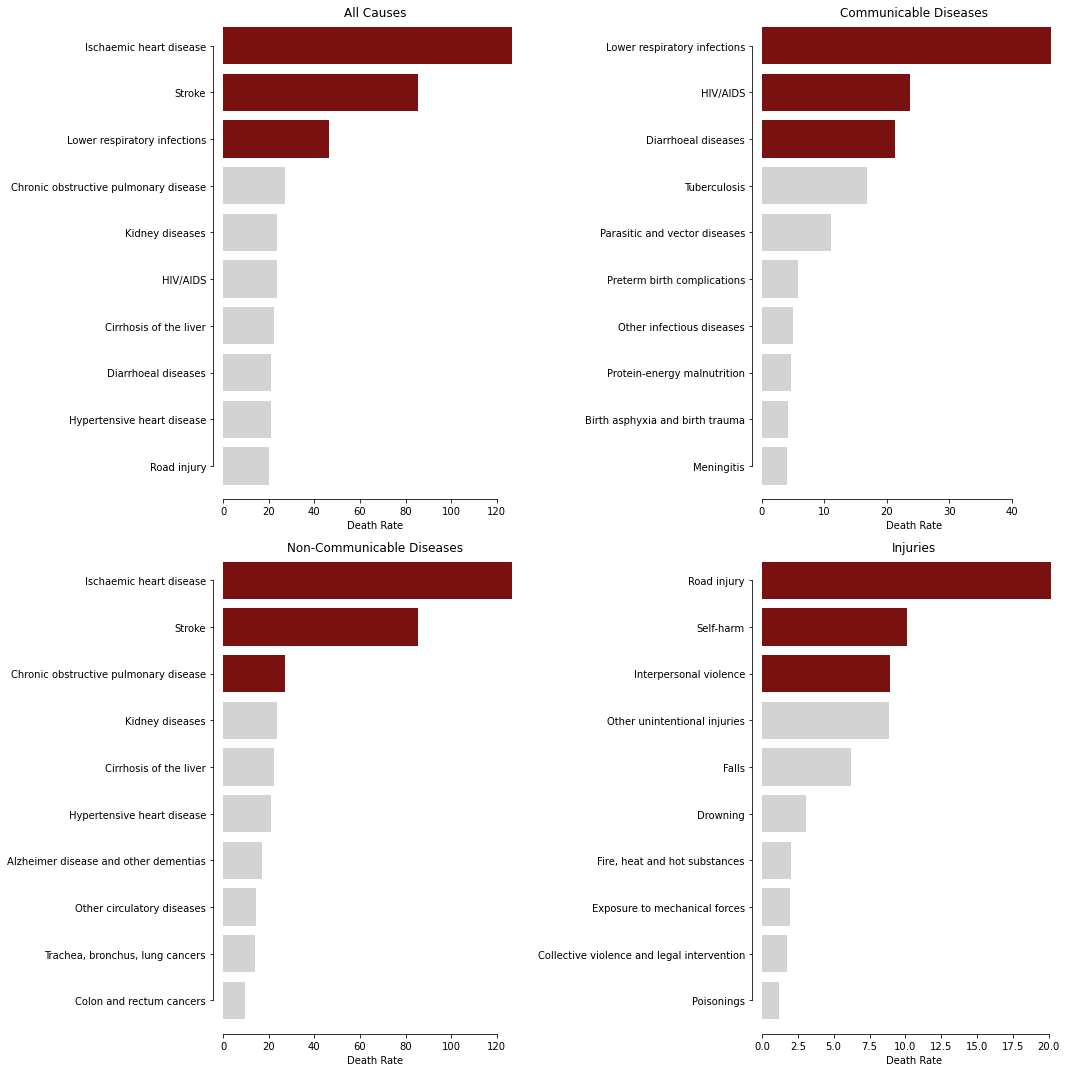

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
sns.barplot(data=tmp, x="Death Rate", y="Disease Name", palette = colors, ax=ax[0,0])
sns.barplot(data=tmp4, x="Death Rate", y="Disease Name", palette = colors, ax=ax[0,1])
sns.barplot(data=tmp2, x="Death Rate", y="Disease Name", palette = colors, ax=ax[1,0])
sns.barplot(data=tmp3, x="Death Rate", y="Disease Name", palette = colors, ax=ax[1,1])

ax[0, 0].set_title("All Causes")
ax[0, 1].set_title("Communicable Diseases")
ax[1, 0].set_title("Non-Communicable Diseases")
ax[1, 1].set_title("Injuries")

nrows, ncols = ax.shape
for row in range(nrows):
    for col in range(ncols):
        ax[row, col].set_ylabel("")

sns.despine(offset=10, trim=True);

plt.tight_layout()
plt.show()

### By Country Analysis

In [143]:
continents = pd.read_csv('continents-according-to-our-world-in-data.csv')

In [170]:
data2 = pd.merge(data, continents[['Entity','Continent']], left_on = 'Country', right_on = 'Entity', how = 'left')

In [171]:
data2.drop(columns='Entity', inplace=True)

In [208]:
undefined = list(data2['Country'][data2['Continent'].isna()].unique())

In [209]:
continents_missing = ['South America','Asia','Africa','Africa','Asia','Africa','Asia','Asia','Oceania', 'Asia',
                      'Europe','Europe','Asia','Asia','Africa','North America','South America','Asia']

In [220]:
missing_continents = { 'Country' : undefined,
                     'Continent' : continents_missing}

In [222]:
missing_continents = pd.DataFrame(missing_continents)

In [224]:
data2 = pd.merge(data2, missing_continents, on = 'Country', how = 'left')
data2['Continent'] = data2['Continent_x'].fillna(data2['Continent_y'])
data2 = data2.drop(['Continent_x', 'Continent_y'], axis=1)

In [227]:
data2.isna().sum()

Disease Group      0
Disease Group 2    0
Disease Name       0
Country            0
Death Rate         0
Year               0
Continent          0
dtype: int64

In [230]:
data2_2019 = data2[data2['Year'] == 2019]

In [304]:
graph = data2_2019.groupby(['Continent','Disease Group'])['Death Rate'].mean().reset_index()
graph_sorted = data2_2019.groupby(['Continent','Disease Group'])['Death Rate'].mean().sort_values(ascending = False).reset_index()

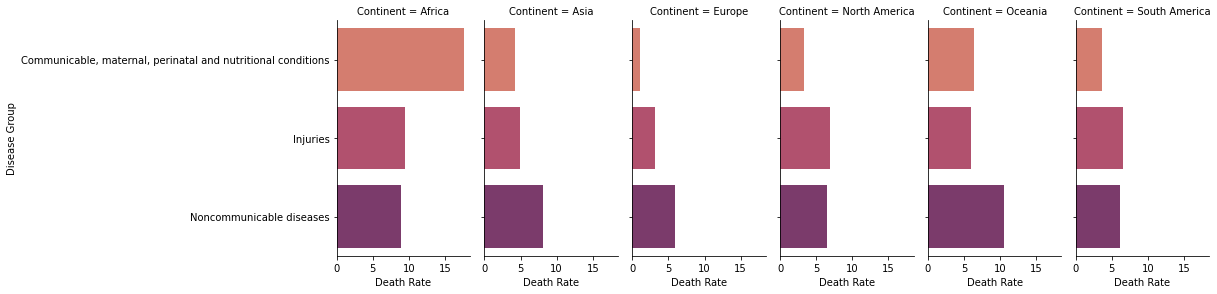

In [305]:
 sns.catplot(x= 'Death Rate', y= 'Disease Group', col="Continent",
                 data=graph, kind="bar",
                 height=4, aspect=.7, palette = 'flare');

<AxesSubplot:xlabel='Death Rate', ylabel='Continent'>

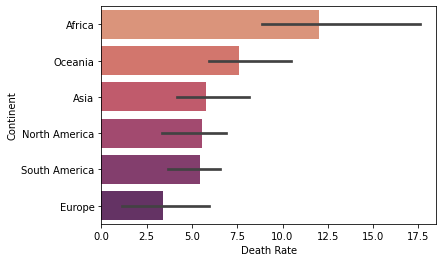

In [306]:
sns.barplot(data=graph_sorted, x="Death Rate", y="Continent", palette = 'flare')

In [267]:
europe_deathrates = data2[data2['Continent'] == 'Europe']

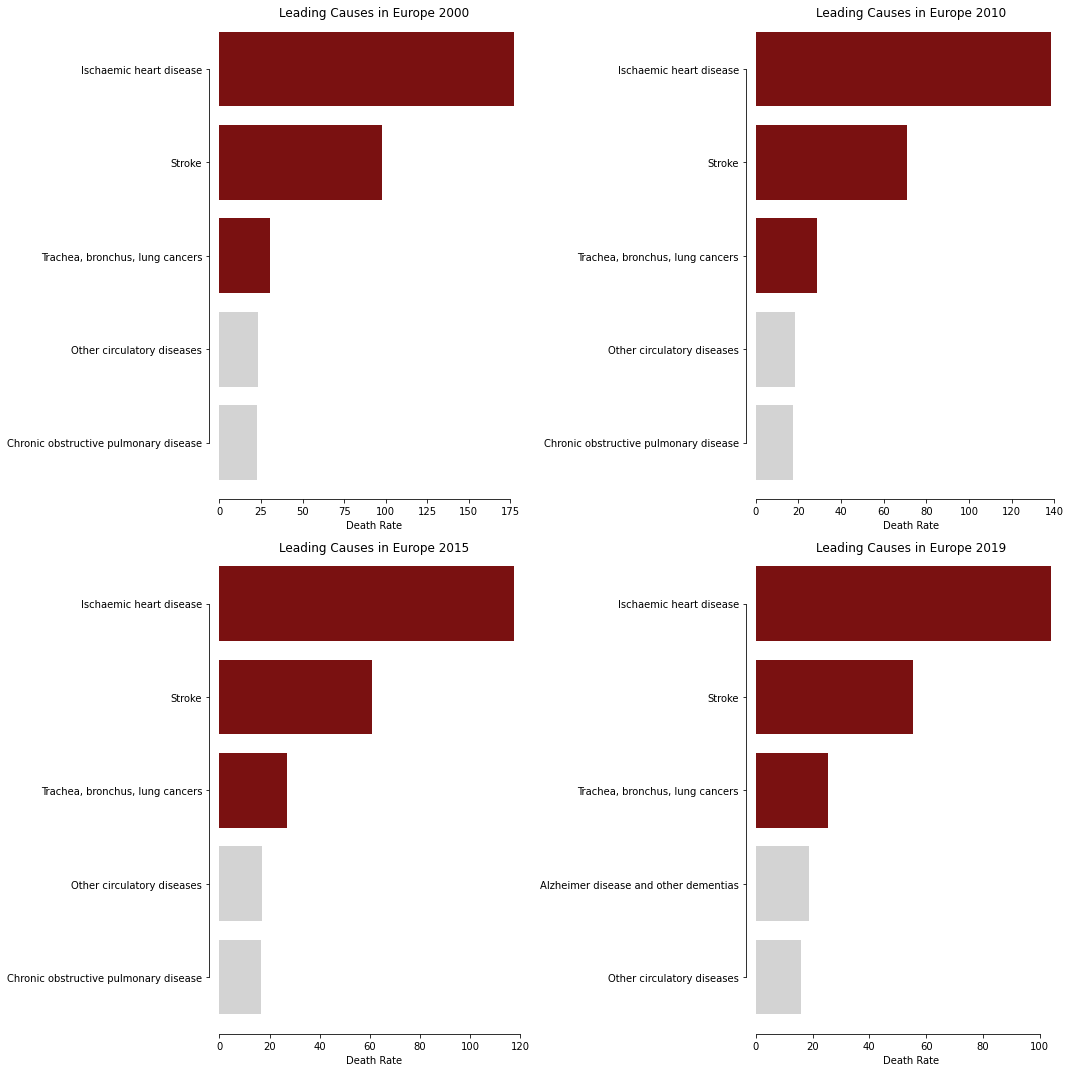

In [307]:
#leading cause of death by year

leading_causes = europe_deathrates.groupby(['Year','Disease Name'])['Death Rate'].mean().reset_index()

# Find the top 10 leading causes:

graph2_leading = leading_causes.groupby('Year').apply(lambda x:
                                                     x.nlargest(5, 'Death Rate')).reset_index(drop=True)

# Create a bar plot
colors = ["darkred"] * 3 + ["lightgrey"] * 7
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (15,15))
sns.barplot(data=graph2_leading[graph2_leading['Year'] == 2000],
            x="Death Rate", y="Disease Name",palette = colors, ax=ax[0,0])
sns.barplot(data=graph2_leading[graph2_leading['Year'] == 2010],
            x="Death Rate", y="Disease Name", palette = colors, ax=ax[0,1])
sns.barplot(data=graph2_leading[graph2_leading['Year'] == 2015],
            x="Death Rate", y="Disease Name", palette = colors, ax=ax[1,0])
sns.barplot(data=graph2_leading[graph2_leading['Year'] == 2019],
            x="Death Rate", y="Disease Name", palette = colors, ax=ax[1,1])

ax[0, 0].set_title("Leading Causes in Europe 2000")
ax[0, 1].set_title("Leading Causes in Europe 2010")
ax[1, 0].set_title("Leading Causes in Europe 2015")
ax[1, 1].set_title("Leading Causes in Europe 2019")

nrows, ncols = ax.shape
for row in range(nrows):
    for col in range(ncols):
        ax[row, col].set_ylabel("")

sns.despine(offset=10, trim=True);

plt.tight_layout()
plt.show()

In [296]:
graph2_leading[graph2_leading['Year'] == 2000]

,Year,Disease Name,Death Rate
0,2000,Ischaemic heart disease,177.35850
1,2000,Stroke,97.57175
2,2000,"Trachea, bronchus, lung cancers",30.47050
3,2000,Other circulatory diseases,23.54125
4,2000,Chronic obstructive pulmonary disease,22.43125
5,2000,Lower respiratory infections,18.58625
6,2000,Colon and rectum cancers,17.71800
7,2000,Self-harm,16.25650
8,2000,"Cardiomyopathy, myocarditis, endocarditis",16.01300
9,2000,Cirrhosis of the liver,14.29800


In [ ]:
graph2['Year']